In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GetData import WISE_LC

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

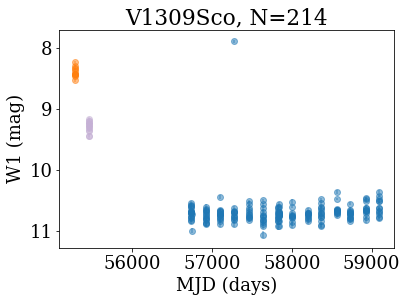

In [35]:
# download the data and generate some WISE plots.
# this is based on a wrapper script I was using previously...
df1, df2, df3, df4 = WISE_LC('V1309Sco', returndata=True)

# there's a bad datapoint (ra,dec is off) in df1 (NEOWISE)
df1 = df1.drop(np.where((df1['w1mpro'] < 8))[0])

In [6]:
vvv_file = 'data/wdb_query_54573_eso.csv'
vvv = pd.read_csv(vvv_file, skiprows=2, comment='#')
print(vvv.columns)

plt.scatter(vvv['MJD Obs'], vvv['ABMAGLIM'], marker='o', alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('$K_S$ (Mag)')

#--> the original data is blended, not reliable apparently

Index(['ARCFILE', 'Object', 'RA', 'DEC', 'Filter', 'ABMAGLIM', 'SNR',
       'R (&lambda;/&delta;&lambda;)', 'Product category', 'Instrument',
       'MJD Obs', 'Exptime', 'Collection', 'Product version', 'Run/Program ID',
       'ORIGFILE', 'REFERENC'],
      dtype='object')

Text(0, 0.5, '$K_S$ (Mag)')

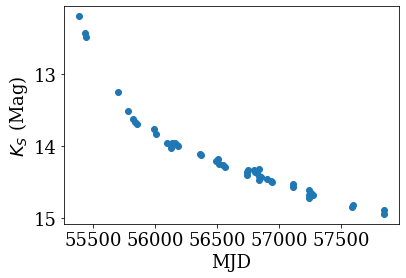

In [13]:
# Ferreira et al. did more careful photometry... which they don't publish. 
# Might be able to get from them, but for now I've digitized their figure

vvv = pd.read_csv('data/VVV_digitized.csv', names=('MJD', 'Ks'))
plt.scatter(vvv['MJD'], vvv['Ks'])
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('$K_S$ (Mag)')

# plt.savefig('fig1.pdf', dpi=300, bbox_inches='tight', pad_inches=0.25)


In [48]:
jd = np.array([2455437, 2457282], dtype='float')
J = np.array([13.849, 15.080], dtype='float')
Ks = np.array([12.449, 14.659], dtype='float')

dist=2100. # pc

Text(0.5, 1.0, 'V1309 Sco')

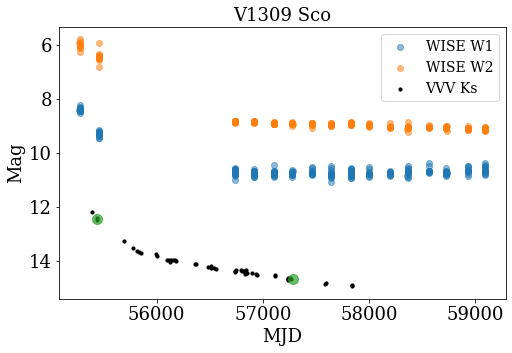

In [80]:
plt.figure(figsize=(8,5))

W1 = np.concatenate((df1['w1mpro'],df2['w1mpro'],df3['w1mpro']))
W2 = np.concatenate((df1['w2mpro'],df2['w2mpro'],df3['w2mpro']))
MJD = np.concatenate((df1['mjd'],df2['mjd'],df3['mjd']))

plt.scatter(MJD, W1,c='C0', label='WISE W1', alpha=0.5)

plt.scatter(MJD, W2,c='C1', label='WISE W2', alpha=0.5)

plt.scatter(vvv['MJD'], vvv['Ks'], c='k', s=10, label='VVV Ks')

plt.scatter(jd-2400000.5, Ks, c='C2', s=100, alpha=0.7)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('Mag')
plt.title('V1309 Sco', fontsize=18)

Text(0, 0.5, '$M_{W1}$')

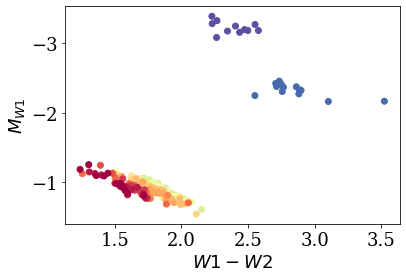

In [68]:
plt.scatter(W1-W2, W1 - 5*np.log10(dist) + 5, c=MJD, cmap=plt.cm.Spectral_r)

plt.gca().invert_yaxis()
plt.xlabel('$W1-W2$')
plt.ylabel('$M_{W1}$')

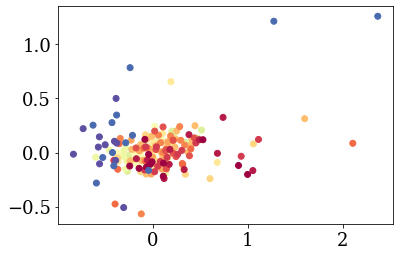

In [47]:
# are we seeing blending take over? Has V1309 Sco actually disappeared from WISE?

RA = np.concatenate((df1['ra'],df2['ra'],df3['ra']))
DEC = np.concatenate((df1['dec'],df2['dec'],df3['dec']))
plt.scatter((RA-np.nanmedian(RA))*60*60, 
            (DEC-np.nanmedian(DEC))*60*60, 
            c=MJD, cmap=plt.cm.Spectral_r)

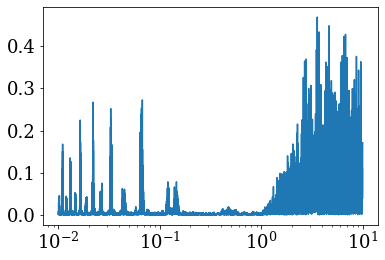

In [65]:
from astropy.timeseries import LombScargle

LS_W1 = LombScargle(MJD, W2)

periods = np.logspace(-2,1, 10000)
power = LS_W1.power(1/periods)

plt.plot(periods,power)
plt.xscale('log')

# there's no robust short period I can see in the WISE data...